# TOI 263.01 19.12.2019

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from muscat2ta.transitanalysis import NP, TransitAnalysis as TA
from corner import corner
import seaborn as sb

In [30]:
ta = TA('toi00263.01', '181219', 0, [2,3,4,5], nlegendre=3, use_opencl=True, 
        npop=400, with_contamination=False, radius_ratio='chromatic')

In [31]:
ta.set_prior(1, NP(0.557 , 0.001))

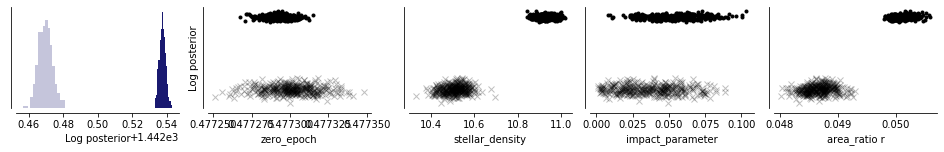

In [36]:
ta.optimize(1500)

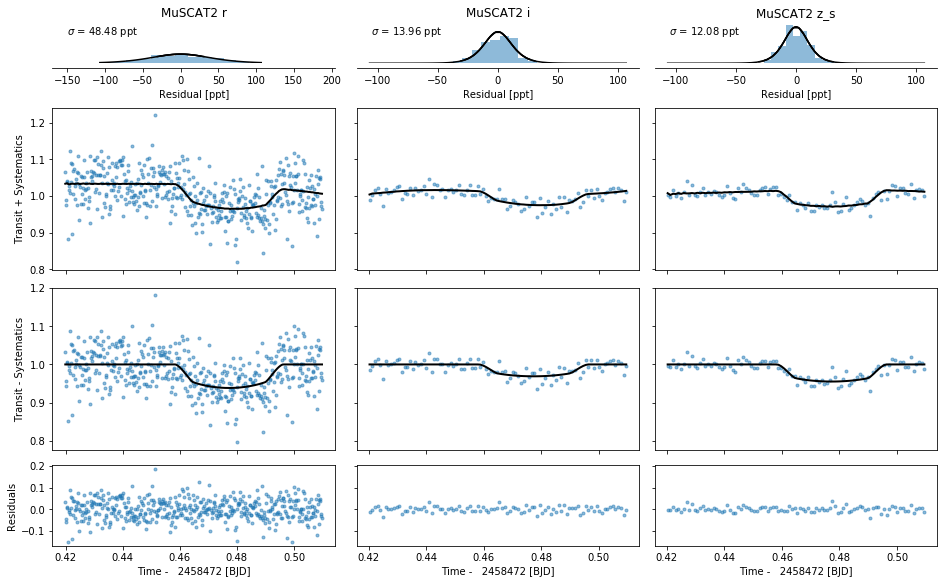

In [37]:
fig = ta.plot_light_curve()

In [38]:
ta.freeze_photometry()

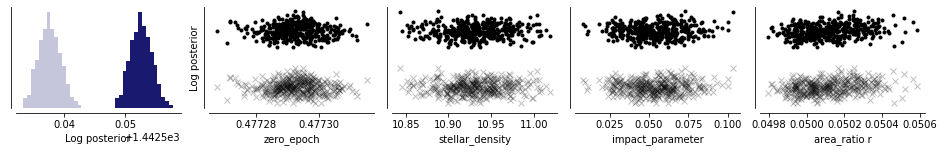

In [39]:
ta.optimize(500)

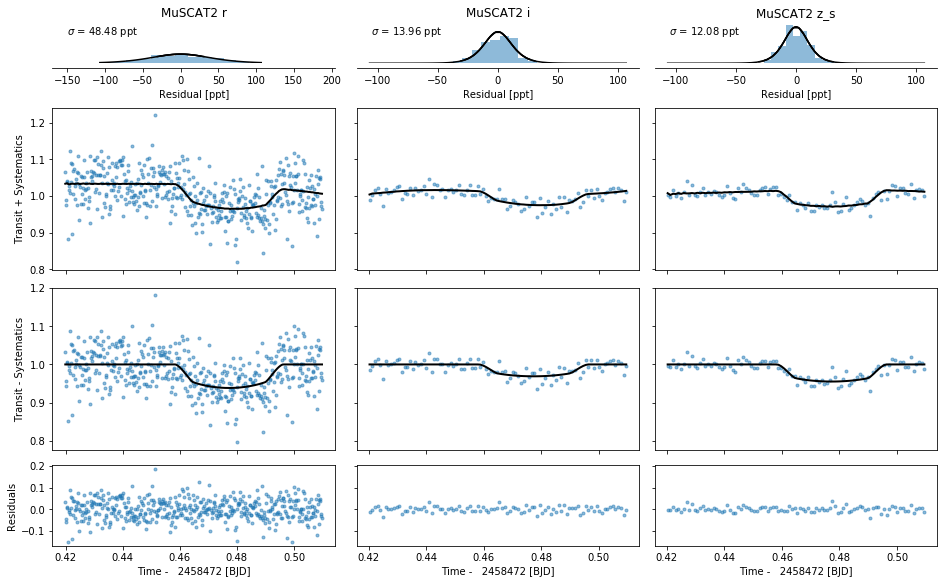

In [40]:
fig = ta.plot_light_curve(save=True)

In [58]:
ta.sample(4000, 40, repeats=2)

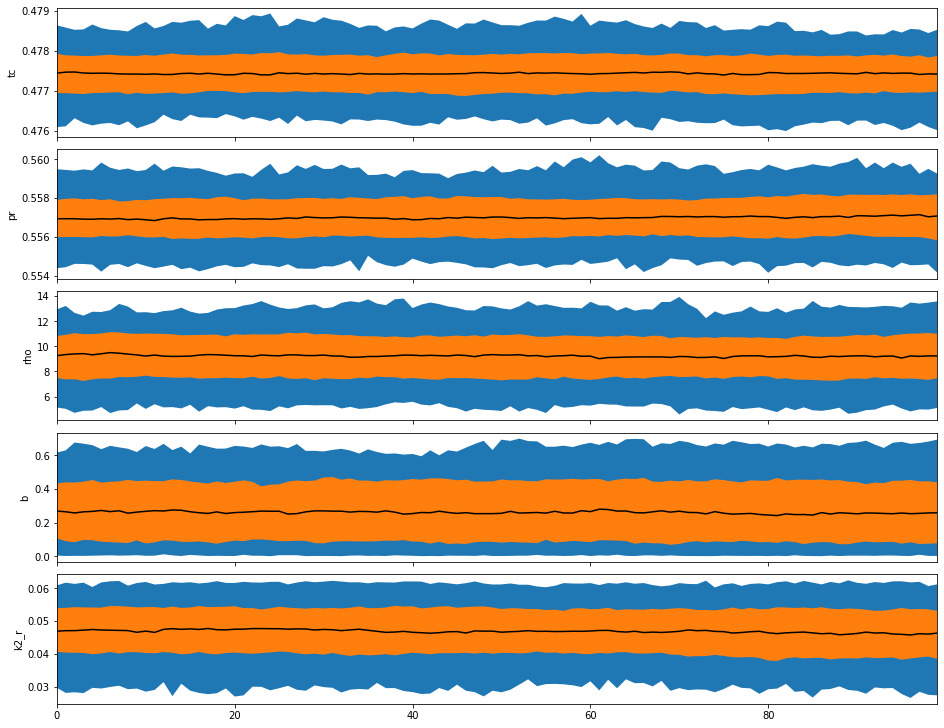

In [59]:
ta.lpf.plot_chains()

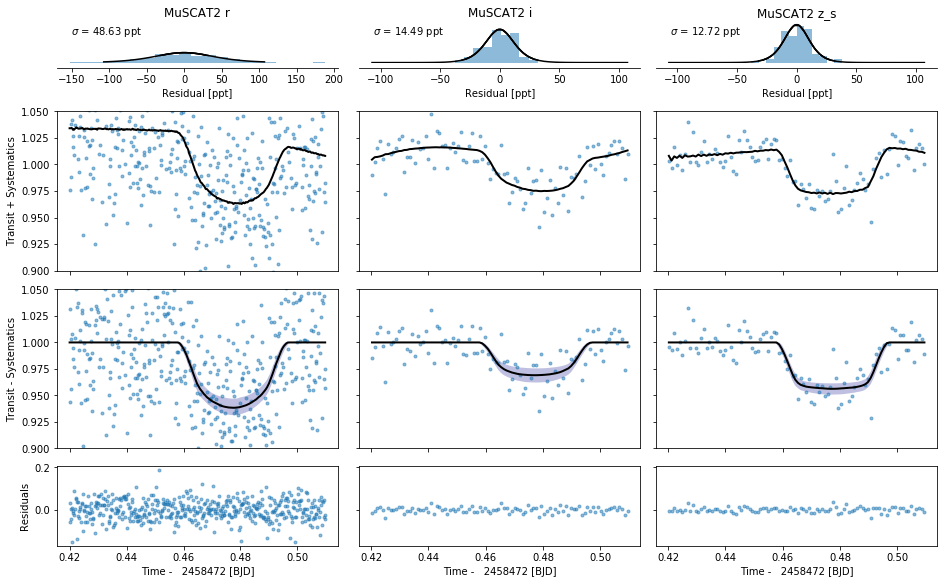

In [60]:
fig, axs = ta.lpf.plot_light_curves('mc')
setp(axs[1], ylim=(0.9,1.05));
setp(axs[2], ylim=(0.9,1.05));

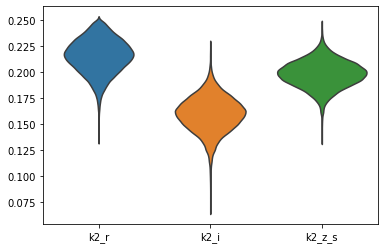

In [61]:
df = ta.posterior_samples()
sb.violinplot(data=sqrt(df.iloc[:,4:]), inner=None)

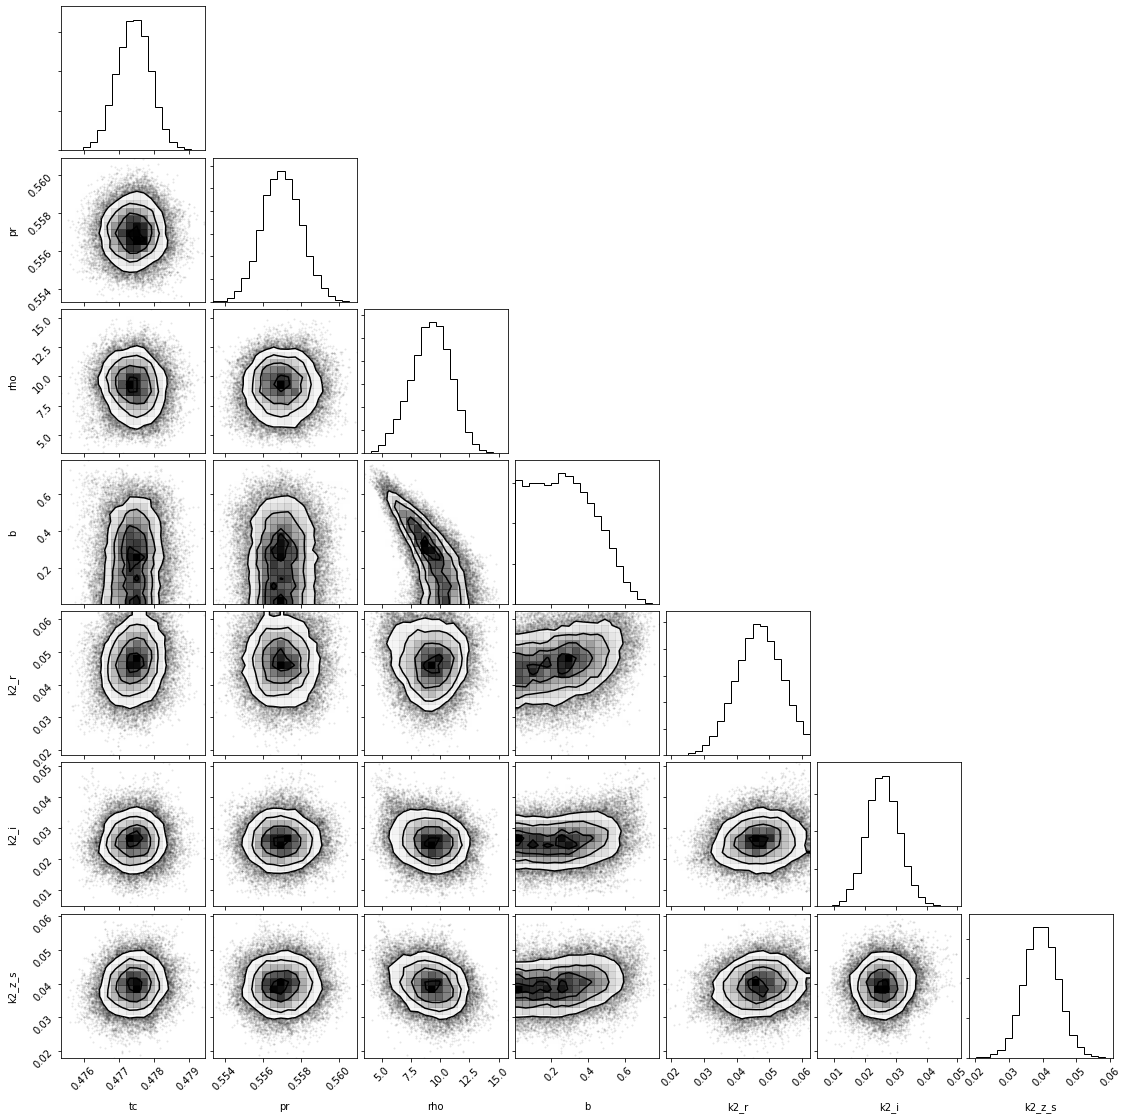

In [62]:
corner(df);

In [63]:
ta.save()
ta.pbs = ta.lpf.passbands
ta.save_fits()